# Tech Challenge #1

Desenvoler um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde

**Dataset**:

Medical Insurance Costs on #kaggle

https://www.kaggle.com/datasets/joebeachcapital/medical-insurance-costs?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

# Exploração de dados


*   Carregue a base de dados e explore suas características
*   Analise estatísticas descritivas e visualize distribuições relevantes




In [129]:
#Carregando dados e visualização de algumas linhas do dataset
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [130]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [131]:
#Exibindo informações sobre os tipos de dados que compõe o dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


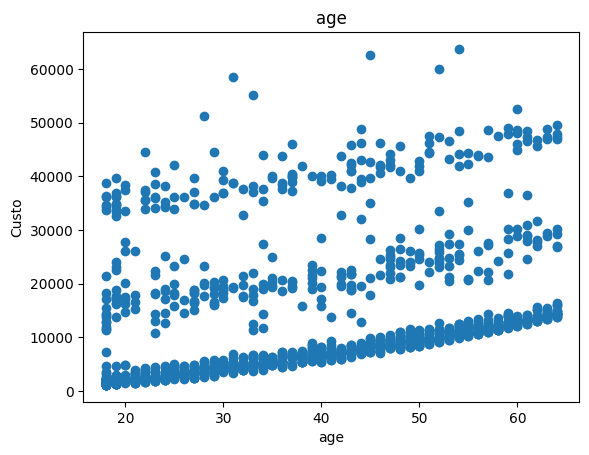

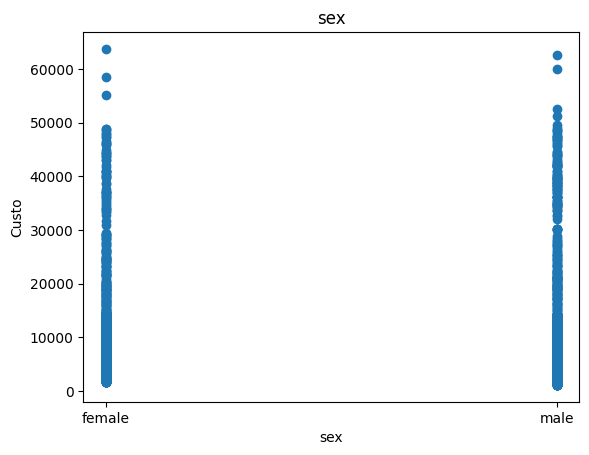

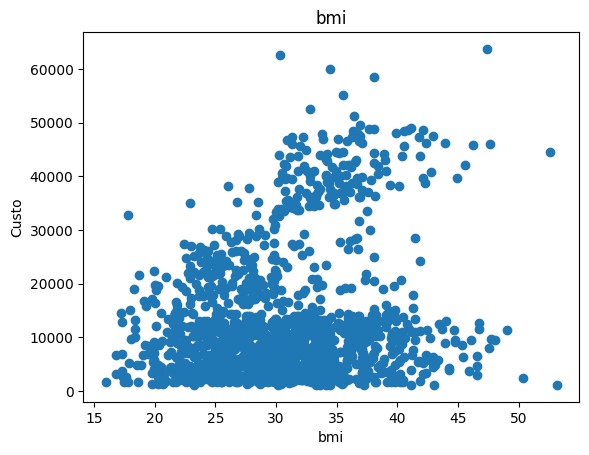

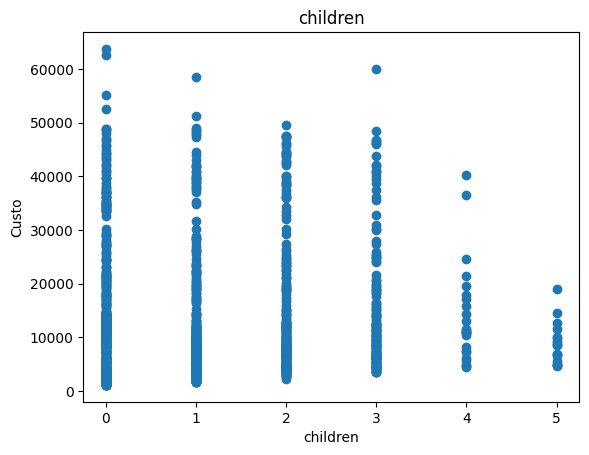

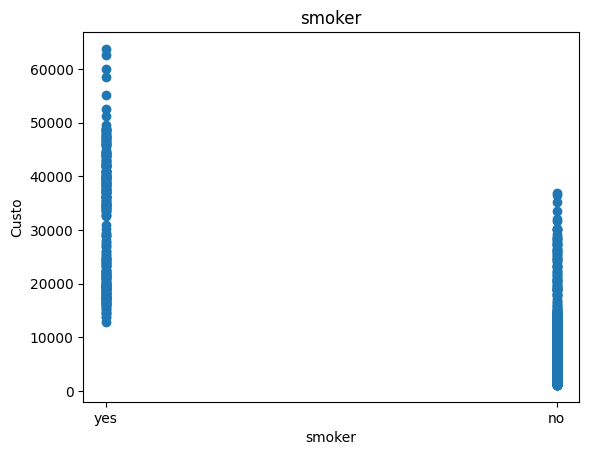

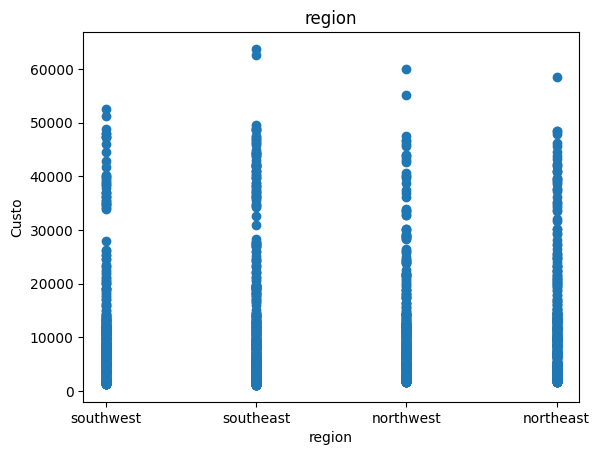

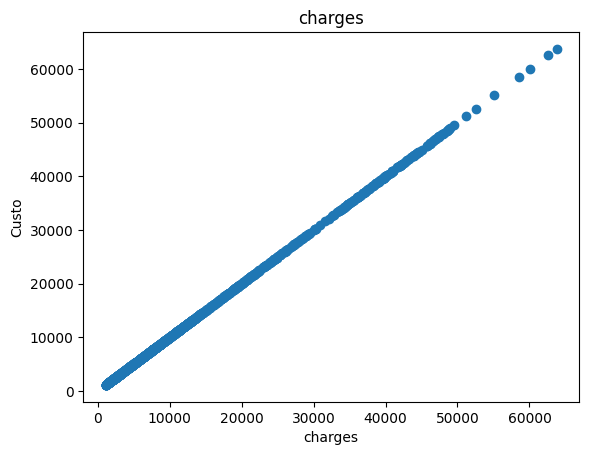

In [132]:
#Colocando em um gráfico a correlação entre cada caracterisca do dataset com o valor do custo médico
for label in data:
  plt.scatter(data[label], data["charges"])
  plt.title(label)
  plt.ylabel("Custo")
  plt.xlabel(label)
  plt.show()

# Pré-processamento de dados



*   Realize a limpeza de dados, tratando valores ausentes(se necessário)
*   Converta variaveis categóricas em formatos adequados para modelagem



In [133]:
#Utilizando LabelEncoder para subistituir valores categóricos simples (SIM OU NÃO, MASCULINO OU FEMININO) para números
label_encoder = LabelEncoder()

data_cleaned = data.copy()
data_cleaned["sex"] = label_encoder.fit_transform(data["sex"])
data_cleaned["smoker"] = label_encoder.fit_transform(data["smoker"])
data_cleaned["region"] = label_encoder.fit_transform(data["region"])

# Modelagem


*   Divida o conjunto de dados em conjuntos de treinamento e teste
*   Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (ex: Regressão Linear, Árvore de Decisão, etc)



In [134]:
#Removendo target
X = data_cleaned.copy()
X.drop(["charges"], axis=1, inplace=True)

#Separando target das features
y = data_cleaned.copy()[["charges"]]

In [142]:
#Deixando os dados na mesma escala
features = ["age", "sex", "bmi", "children", "smoker", "region"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=features)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

# Modelo de Regressão Linear Multipla

In [144]:
#Preparando o nosso modelo com Regressão Linear
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_predicts = linear_regression.predict(X_test)

In [145]:
#A fazer: Exibir em gráfico a distancia entre os campos previsto e os pontos reais
#A fazer: Testar outro algoritmo de regressão e comprar os resultados
linear_regression_score = r2_score(y_test, linear_regression_predicts)
linear_regression_error = mean_absolute_error(y_test, linear_regression_predicts)

In [146]:
print(f'Linear Regression Score: {linear_regression_score}')
print(f'Linear Regression Error: {linear_regression_error}')

Linear Regression Score: 0.7348136813877889
Linear Regression Error: 4220.715790710183


# Modelo de Arvore de Decisão

In [147]:
def generate_decision_tree(depth, x, y):
  decision_tree = DecisionTreeRegressor(max_depth=depth)
  decision_tree.fit(x, y)
  return decision_tree

In [148]:
scores = []
for depth in range(1,6):
  model = generate_decision_tree(depth, X_train, y_train)
  predict = model.predict(X_test)
  result = r2_score(y_test, predict)
  scores.append(result)

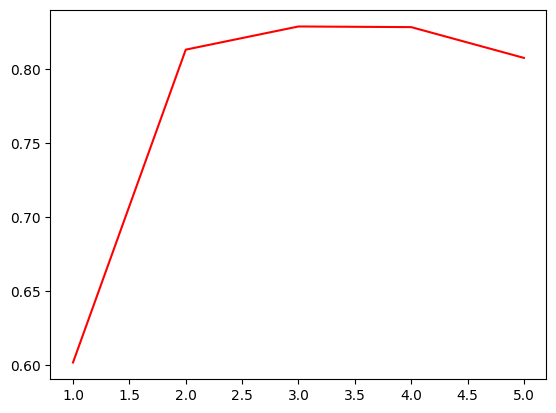

In [149]:
plt.plot(range(1,6), scores, color="red")
plt.show()

In [150]:
#Após definir qual a melhor quantidade de profunidade para nossa arvore, vamos escolher o melhor parametro para fazer as predições
decision_tree = generate_decision_tree(4, X_train, y_train)
decision_tree_predicts = decision_tree.predict(X_test)

decision_tree_score = r2_score(y_test, decision_tree_predicts)
decision_tree_error = mean_absolute_error(y_test, decision_tree_predicts)

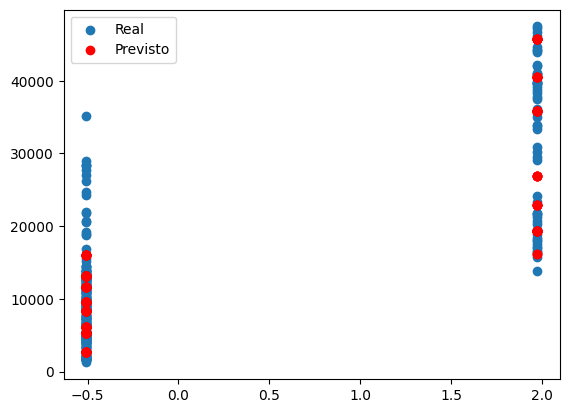

In [151]:
plt.scatter(X_test["smoker"], y_test, label="Real")
plt.scatter(X_test["smoker"], decision_tree_predicts, label="Previsto", color="red")
plt.legend()
plt.show()

# Validação estatística

In [152]:
print(f'Erro Regressão Linear: {linear_regression_error}')
print(f'Erro Arvore de Decisão: {decision_tree_error}')
print("---------------")
print(f'Score Regressão Linear: {linear_regression_score}')
print(f'Score Arvore de Decisão: {decision_tree_score}')

Erro Regressão Linear: 4220.715790710183
Erro Arvore de Decisão: 2845.180916746848
---------------
Score Regressão Linear: 0.7348136813877889
Score Arvore de Decisão: 0.8284825175826152


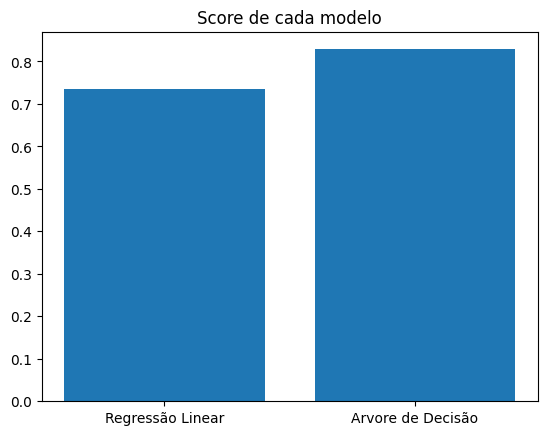

In [153]:
x_axis = ["Regressão Linear", "Arvore de Decisão"]
y_axis = [linear_regression_score, decision_tree_score]
plt.bar(x_axis, y_axis)
plt.title("Score de cada modelo")
plt.show()

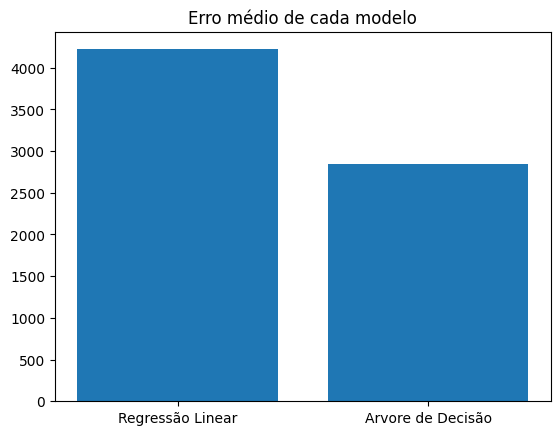

In [154]:
x_axis = ["Regressão Linear", "Arvore de Decisão"]
y_axis = [linear_regression_error, decision_tree_error]
plt.bar(x_axis, y_axis)
plt.title("Erro médio de cada modelo")
plt.show()